In [180]:
!pip install sklearn2pmml
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [181]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import random
import string
from termcolor import colored as cl # text customizationsize=len(R_7['V26'])
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,History
import pickle, math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef,confusion_matrix, roc_curve, auc,precision_recall_curve, balanced_accuracy_score, roc_auc_score
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn import metrics
import time


# Data After Cleaning & preprocessing

In [334]:
data = pd.read_excel("preprocessing_data.xlsx")

In [335]:
data.isnull().sum()

V1                0
V2                0
V3                0
V4                0
V9                0
V10               0
V12               0
V13               0
V16               0
V19               0
V21               0
V22               0
V24               0
V25               0
V26               0
V27               0
COS(V6_month)     0
COS(V6_day)       0
COS(V7_month)     0
COS(V7_day)       0
COS(V23_month)    0
COS(V23_day)      0
COS(V8_month)     0
COS(V8_day)       0
SIN(V6_month)     0
SIN(V6_day)       0
SIN(V7_month)     0
SIN(V7_day)       0
SIN(V23_month)    0
SIN(V23_day)      0
SIN(V8_month)     0
SIN(V8_day)       0
V6_year           0
V7_year           0
V23_year          0
V8_year           0
CLASS             0
dtype: int64

In [336]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
V1,71444.0,2.528848,1.571095,0.0,1.0,3.0,4.0,6.0
V2,71444.0,1.639270,0.485174,0.0,1.0,2.0,2.0,3.0
V3,71444.0,17.339399,5.964173,0.0,17.0,17.0,17.0,100.0
V4,71444.0,2.989936,0.131838,0.0,3.0,3.0,3.0,3.0
V9,71444.0,284927.883545,243755.627387,10.0,65000.0,200189.0,486250.0,800000.0


In [337]:
data.shape

(71444, 37)

In [338]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V12', 'V13', 'V16', 'V19', 'V21',
       'V22', 'V24', 'V25', 'V26', 'V27', 'COS(V6_month)', 'COS(V6_day)',
       'COS(V7_month)', 'COS(V7_day)', 'COS(V23_month)', 'COS(V23_day)',
       'COS(V8_month)', 'COS(V8_day)', 'SIN(V6_month)', 'SIN(V6_day)',
       'SIN(V7_month)', 'SIN(V7_day)', 'SIN(V23_month)', 'SIN(V23_day)',
       'SIN(V8_month)', 'SIN(V8_day)', 'V6_year', 'V7_year', 'V23_year',
       'V8_year', 'CLASS'],
      dtype='object')

In [339]:
data["CLASS"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,  0])

In [340]:
# Supprimer les enregistrements où la colonne de classe est égale à 0
data = data[data['CLASS'] != 0]
data['CLASS'] = data['CLASS'] - 1

<ipython-input-340-fd0eadacd646>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLASS'] = data['CLASS'] - 1


In [341]:
data["CLASS"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

In [342]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

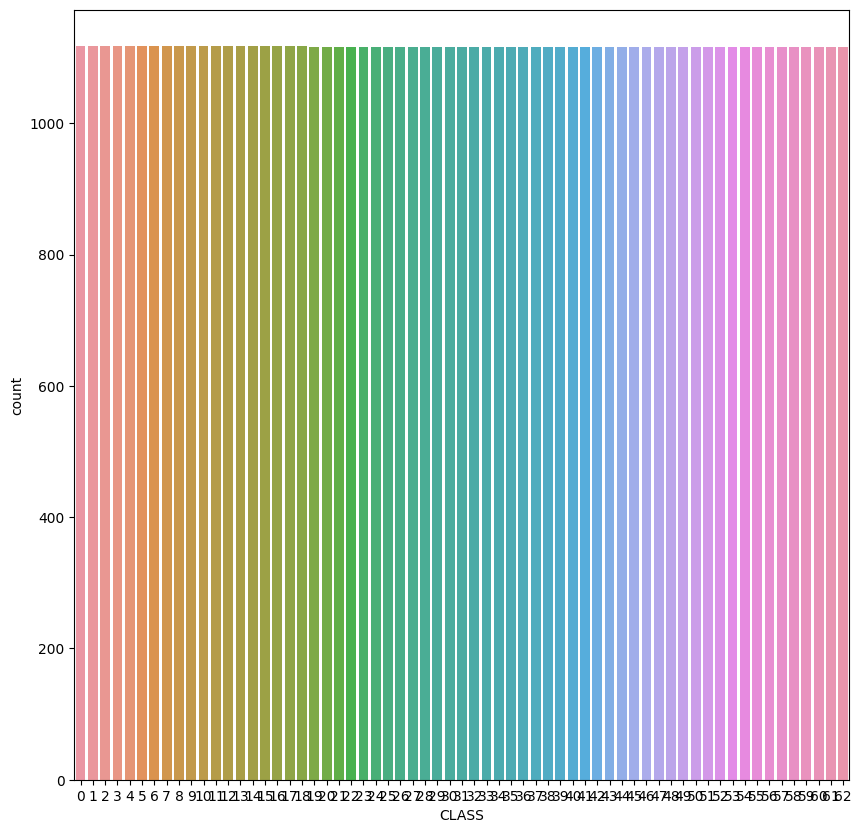

In [343]:
countplot_data(data, data.CLASS)


In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = data.corr()
# Afficher la matrice de corrélation avec Seaborn
print(corr_matrix)

                      V1        V2        V3        V4        V9       V10  \
V1              1.000000  0.658600  0.112317  0.051263  0.413607  0.239399   
V2              0.658600  1.000000  0.030285  0.031840  0.620471  0.291427   
V3              0.112317  0.030285  1.000000  0.014088  0.025932 -0.088574   
V4              0.051263  0.031840  0.014088  1.000000  0.016815  0.031797   
V9              0.413607  0.620471  0.025932  0.016815  1.000000  0.203438   
V10             0.239399  0.291427 -0.088574  0.031797  0.203438  1.000000   
V12             0.039866 -0.001636 -0.013803 -0.105397  0.001109 -0.085329   
V13             0.014298 -0.004323 -0.000264 -0.000431  0.000635 -0.000213   
V16            -0.128138 -0.149813  0.015727 -0.009137 -0.069660 -0.074568   
V19            -0.334201 -0.498236 -0.020541 -0.019231 -0.322265 -0.150124   
V21             0.072965 -0.004015 -0.017520  0.017402 -0.000089 -0.021038   
V22             0.025633 -0.007413 -0.008327  0.014519 -0.003296

In [345]:
performance = []
X=data.drop(['CLASS'],axis=1)
y=data['CLASS']
models = ['LogisticRegression','K nearest Neighbour','Linear Discriminant Analysis','Support Vector Machines','Decision Tree','Random Foreset','Extra Trees','Gausian Naive bayes','eExtreme gradient boosting']
def RunModel(model, X_train, y_train, X_test, y_test,i):
    #Training the model
    m = model.fit(X_train,y_train) 
    start_time = time.time()  # record start time 
    # Prédire les classes pour les données de test
    pred = model.predict(X_test)
    end_time = time.time()  # record end time
    time_taken = end_time - start_time  # calculate time taken
    accuracy_s = accuracy_score(y_test, pred) # calculate performance score
    recall_s = recall_score(pred, y_test,average='macro') #Recall score
    f1_s = f1_score(y_test, pred,average='macro')
    performance.append({'Model': models[i], 'Accuracy': accuracy_s, 'Recall': recall_s, 'F1': f1_s, 'time': time_taken})  # record performance
    # Plot No_normalized confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, pred)
    # Plot normalized confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True,title='Normalized confusion matrix')
    print('Model :',model)
    print('Accuracy : ',accuracy_s)
    print (classification_report(y_test, pred))
    return model
def ROC(model, X_train, y_train, X_test, y_test):
    #Training the model
    m = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    y_pred_probability = model.predict_proba(X_test)[::,1]
    # Calculer la courbe ROC et l'AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    roc_auc = auc(fpr, tpr)
    # Afficher la courbe ROC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")
    plt.show()


# Logistic regression


With the dataset defined, separating the input variables from the target variable, we divided the data into training and test sets, importing the train_test_split function.

The train_test_split function uses a randomizer to separate data into training and test sets. In this case, 70% of the data for training and 30% for tests were defined.

The random seed (np.random.seed) is used to ensure that the same data is used for all runs.

In [346]:
# Appliquer le scaling sur les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=123)


In [347]:
#Building the Regression Logistic model
lr=LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model : LogisticRegression()
Accuracy :  0.4936015924925352
              precision    recall  f1-score   support

           0       0.51      0.86      0.64       204
           1       0.04      0.01      0.02       232
           2       1.00      0.96      0.98       217
           3       0.09      0.13      0.10       232
           4       0.28      0.40      0.33       221
           5       0.01      0.00      0.01       226
           6       0.05      0.03      0.04       231
           7       0.88      0.88      0.88       224
           8       1.00      0.91      0.95       223
           9       1.00      1.00      1.00       235
          10       0.37      0.33      0.35       232
          11       0.10      0.26      0.14       230
          12       0.11      0.05      0.07       224
          13       0.99      1.00      1.00       229
          14       0.99      1.00      0.99       199
          15       0.09      0.18      0.12       208
          16       0.

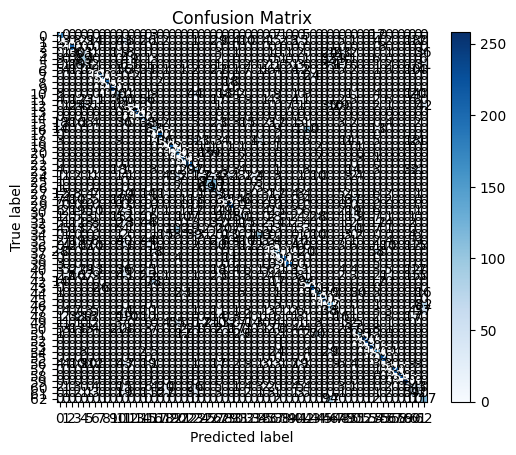

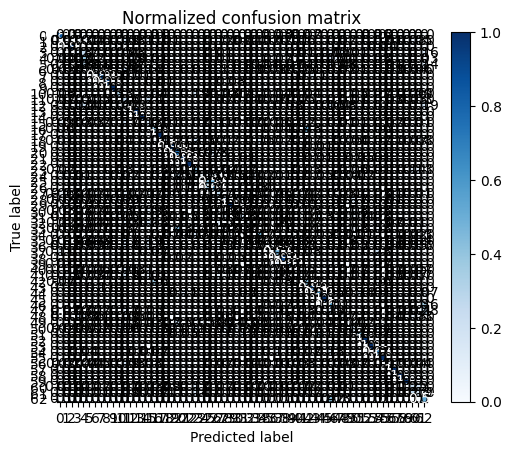

In [348]:
model = RunModel(lr,X_train,y_train, X_test,y_test,0)

In [349]:
from joblib import dump
# Save the trained model to a file
dump(model, 'LogisticRegression.joblib')

['LogisticRegression.joblib']

With the Logistic Regression Model, we have:

14321 transactions classified as normal and were actually normal;

6829 transactions classified as fraud but that were really normal (type 1 error);

8284 transactions classified as normal but which were fraud (type 2 error);

12763 transactions classified as fraud and were actually fraud.




The "ROC" curve is a probability curve that shows how much the classifier can distinguish between two things, through two parameters: the true-positive rate versus the false-positive rate, that is, the number of times the classifier hit the prediction against the number of times the classifier missed the prediction.

The "AUC" is derived from the "ROC" curve and represents the degree or measure of separability. The AUC summarizes the ROC curve in a single value, calculating the “area under the curve”. The higher the AUC the better the model is in predicting 0s as 0s and 1s as 1s. In this case, the higher the AUC the better the model is in distinguishing between fraudulent and normal transactions. The AUC value ranges from 0.0 to 1.0.

An excellent model has AUC close to 1, which means it has a good measure of separability. A poor model has AUC close to 0, which means that it has the worst measure of separability, that is, it is predicting 0s as 1s and 1s as 0s. And when the AUC is 0.5, it means that the model has no class separation capability.

An AUC of 0.64 is better than a random guess (AUC of 0.5), but it is not considered a good result. Generally, an AUC value above 0.7 is considered acceptable, while an AUC value above 0.8 is considered good.

# Linear Discriminant Analysis

In [350]:
# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [351]:
# Créer un objet LDA et entraîner le modèle avec les données de formation
lda = LDA()

Model : LinearDiscriminantAnalysis()
Accuracy :  0.3885966159533627
              precision    recall  f1-score   support

           0       0.31      0.82      0.45       239
           1       0.07      0.02      0.03       220
           2       0.51      0.75      0.61       216
           3       0.04      0.07      0.05       220
           4       0.25      0.55      0.34       243
           5       0.03      0.01      0.01       244
           6       0.08      0.06      0.07       218
           7       0.30      0.64      0.41       229
           8       0.75      0.54      0.63       213
           9       1.00      0.80      0.89       211
          10       0.08      0.02      0.03       227
          11       0.09      0.19      0.12       222
          12       0.04      0.01      0.02       212
          13       1.00      0.79      0.88       232
          14       0.75      0.92      0.83       241
          15       0.08      0.09      0.09       232
          16 

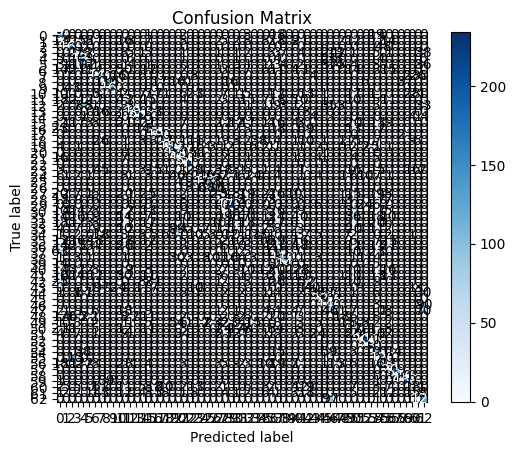

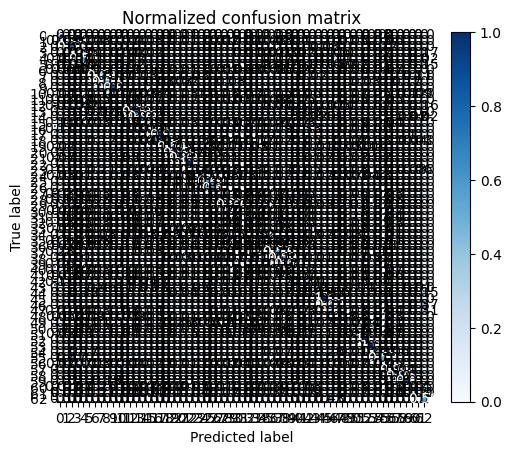

In [352]:
model = RunModel(lda,X_train,y_train, X_test,y_test,2)

In [353]:
dump(model, 'LDA.joblib')

['LDA.joblib']

# Support Vector Machines

In [354]:
X_cols = data.drop("CLASS", axis=1).columns.values

In [355]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [356]:
len(X_train)

56261

In [357]:
## Train the model with PMML wraper
clf = PMMLPipeline(
    [
        (
            "Standard Scaler",
            StandardScaler()
        )
        ,
        (
            "SVM",
            SVC(gamma='auto')
        )
    ]
)

X_train = pd.DataFrame(X_train, columns = list(X_cols))
y_train = pd.Series(y_train, name = "isFraud")
X_test = pd.DataFrame(X_test, columns = list(X_cols))
y_test = pd.Series(y_test, name = "isFraud")

# Train the model
#clf.fit(X_train, y_train)

Model : PMMLPipeline(steps=[('Standard Scaler', StandardScaler()),
       ('SVM', SVC(gamma='auto'))])
Accuracy :  0.5145741504336698
              precision    recall  f1-score   support

           0       0.44      0.80      0.56       216
           1       0.10      0.10      0.10       204
           2       0.98      0.95      0.96       224
           3       0.28      0.19      0.23       230
           4       0.75      0.38      0.50       219
           5       0.29      0.20      0.24       205
           6       0.08      0.09      0.08       216
           7       0.90      0.87      0.88       233
           8       0.92      0.82      0.86       217
           9       0.99      0.98      0.99       238
          10       0.65      0.33      0.44       226
          11       0.14      0.25      0.18       206
          12       0.22      0.15      0.18       212
          13       0.96      0.99      0.98       217
          14       0.99      0.97      0.98       226
 

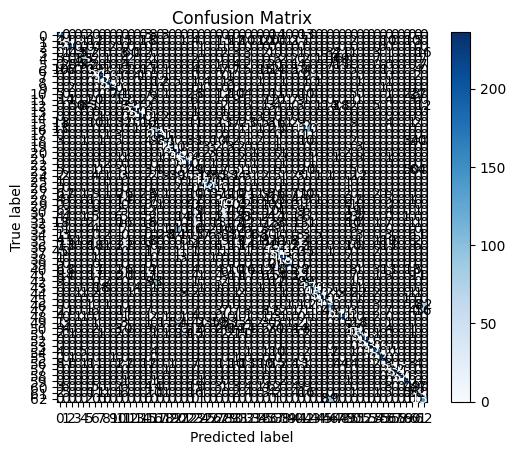

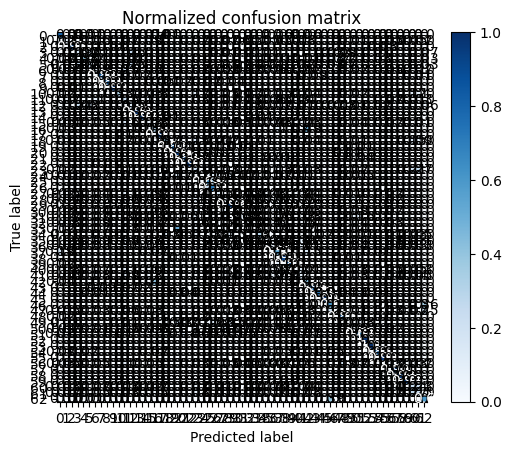

In [358]:
# Train the model
model = RunModel(clf,X_train,y_train, X_test,y_test,3)

In [359]:
# Save the trained model to a file
dump(model, 'SVM.joblib')

['SVM.joblib']

# Decision Tree

In [360]:
from pandas.core.frame import Dtype
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Dt = DecisionTreeClassifier()


Model : DecisionTreeClassifier()
Accuracy :  0.7675956206455282
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       224
           3       0.35      0.30      0.33       230
           4       1.00      1.00      1.00       219
           5       0.33      0.37      0.35       205
           6       0.57      0.54      0.55       216
           7       0.99      1.00      1.00       233
           8       1.00      1.00      1.00       217
           9       1.00      1.00      1.00       238
          10       0.57      0.60      0.58       226
          11       0.79      0.77      0.78       206
          12       0.35      0.36      0.35       212
          13       1.00      1.00      1.00       217
          14       1.00      1.00      1.00       226
          15       0.55      0.56      0.55       204
          16     

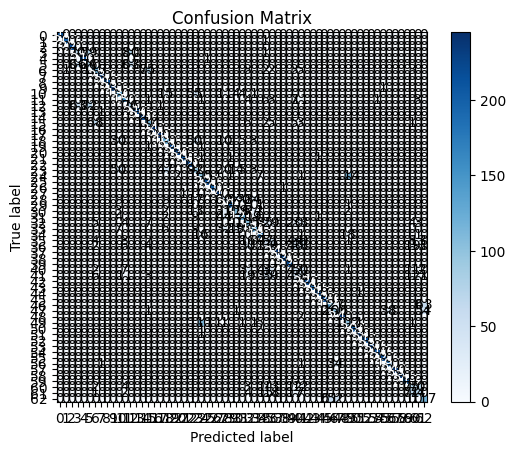

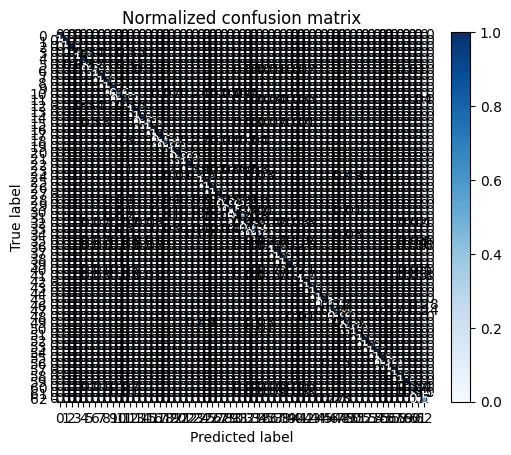

In [361]:
# Train the model
model = RunModel(Dt,X_train,y_train, X_test,y_test,4)

In [362]:
# Save the trained model to a file
dump(model, 'DecisionTree.joblib')

['DecisionTree.joblib']

# Random Foreset

In [363]:
rfc = RandomForestClassifier()

Model : RandomForestClassifier()
Accuracy :  0.7529503767951088
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       224
           3       0.30      0.28      0.29       230
           4       0.99      1.00      1.00       219
           5       0.31      0.32      0.32       205
           6       0.59      0.50      0.54       216
           7       0.97      1.00      0.99       233
           8       1.00      1.00      1.00       217
           9       1.00      1.00      1.00       238
          10       0.64      0.56      0.60       226
          11       0.74      0.79      0.76       206
          12       0.29      0.31      0.30       212
          13       1.00      1.00      1.00       217
          14       1.00      1.00      1.00       226
          15       0.53      0.56      0.54       204
          16     

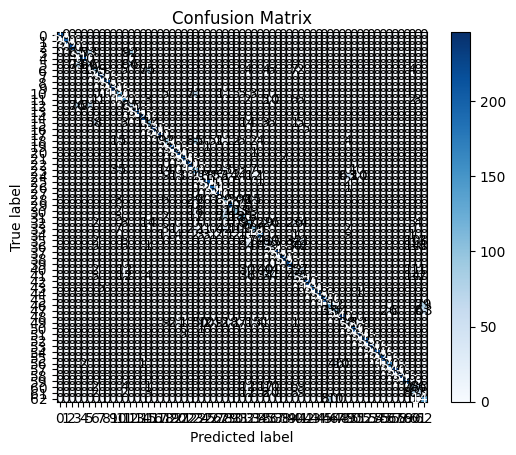

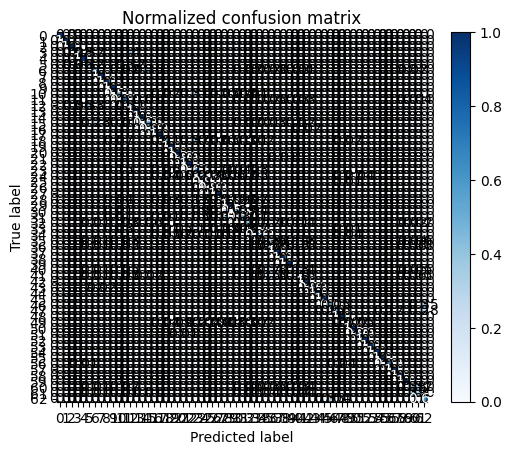

In [364]:
# Train the model
model = RunModel(rfc,X_train,y_train, X_test,y_test,5)

In [365]:
# Save the trained model to a file
dump(model, 'RandomForest.joblib')

['RandomForest.joblib']

# Extra Trees

In [366]:
etc = ExtraTreesClassifier(n_estimators=100, max_depth=4)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model : ExtraTreesClassifier(max_depth=4)
Accuracy :  0.5469216550547419
              precision    recall  f1-score   support

           0       0.36      0.69      0.47       216
           1       0.10      0.39      0.16       204
           2       1.00      0.98      0.99       224
           3       0.44      0.02      0.03       230
           4       0.46      0.59      0.52       219
           5       0.31      0.17      0.22       205
           6       0.40      0.01      0.02       216
           7       0.79      0.81      0.80       233
           8       1.00      0.88      0.94       217
           9       1.00      1.00      1.00       238
          10       0.65      0.50      0.57       226
          11       0.30      0.56      0.39       206
          12       0.28      0.30      0.29       212
          13       0.73      1.00      0.84       217
          14       0.93      1.00      0.97       226
          15       0.27      0.02      0.04       204
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


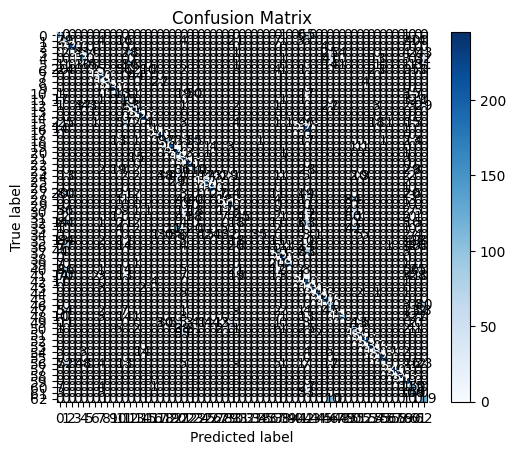

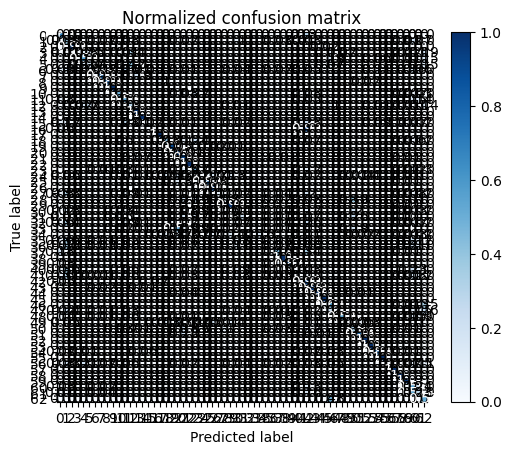

In [367]:
# Train the model
model = RunModel(etc,X_train,y_train, X_test,y_test,6)

In [368]:
# Save the trained model to a file
dump(model, 'ExtraTree.joblib')

['ExtraTree.joblib']

# Gausian Naive bayes

In [369]:
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)

In [370]:
GNB = GaussianNB()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model : GaussianNB()
Accuracy :  0.5587942556519266
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       216
           1       1.00      0.98      0.99       204
           2       1.00      1.00      1.00       224
           3       0.32      0.23      0.26       230
           4       0.69      0.70      0.70       219
           5       0.31      0.72      0.43       205
           6       0.00      0.00      0.00       216
           7       0.59      0.18      0.27       233
           8       0.00      0.00      0.00       217
           9       1.00      1.00      1.00       238
          10       0.00      0.00      0.00       226
          11       0.00      0.00      0.00       206
          12       0.50      0.01      0.02       212
          13       1.00      1.00      1.00       217
          14       1.00      1.00      1.00       226
          15       0.00      0.00      0.00       204
          16       0.17      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


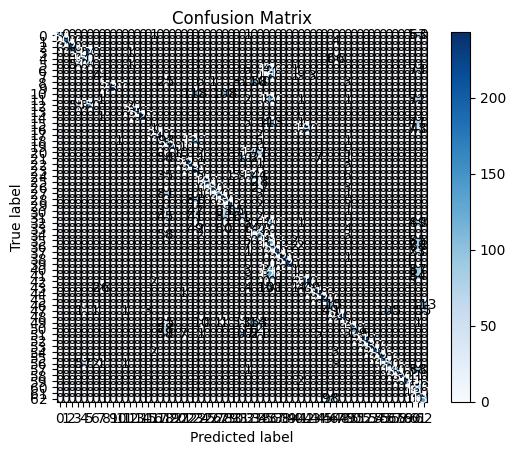

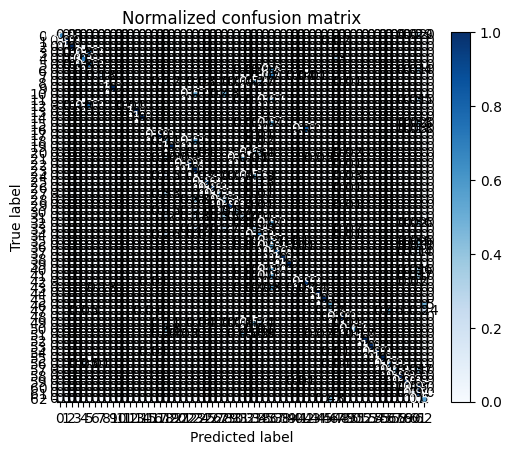

In [371]:
# Train the model
model = RunModel(GNB,X_train,y_train, X_test,y_test,7)

In [372]:
# Save the trained model to a file
dump(model, 'GNB.joblib')

['GNB.joblib']

# eExtreme gradient boosting

In [373]:
classes = data['CLASS'].unique()
print(classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]


In [374]:
EXGB = xgb.XGBClassifier()
#X=data.drop(['CLASS'],axis=1)
#y=data['CLASS']
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Accuracy :  0.7750604294042371
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       204
           2       1.00      1.00    

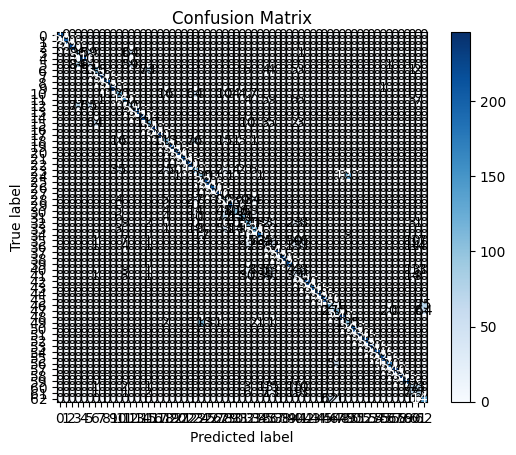

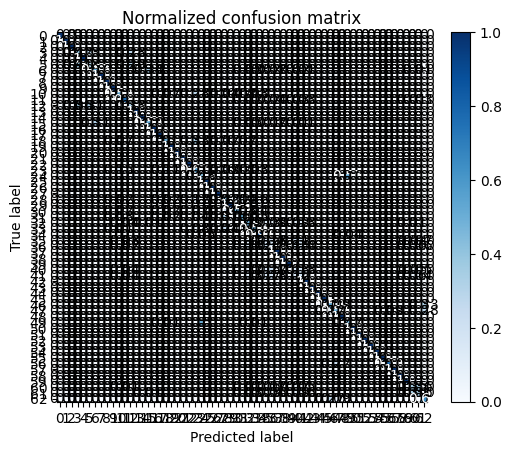

In [375]:
model = RunModel(EXGB,X_train,y_train, X_test,y_test,8)

In [376]:
# Save the trained model to a file
dump(model, 'EXHB.joblib')

['EXHB.joblib']

# Neural network

In [377]:
# Split the data into training and test sets
X = data.drop('CLASS', axis=1).values
y = data['CLASS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for input into the CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(56261, 36, 1)


In [378]:
# Build the deep CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(63, activation='softmax') # softmax activation for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1759/1759 [==============================] - 11s 5ms/step - loss: 2.0961 - accuracy: 0.4062
Epoch 2/50
1759/1759 [==============================] - 10s 6ms/step - loss: 1.3322 - accuracy: 0.5606
Epoch 3/50
1759/1759 [==============================] - 10s 6ms/step - loss: 1.1461 - accuracy: 0.6009
Epoch 4/50
1759/1759 [==============================] - 10s 6ms/step - loss: 1.0626 - accuracy: 0.6193
Epoch 5/50
1759/1759 [==============================] - 9s 5ms/step - loss: 1.0091 - accuracy: 0.6347
Epoch 6/50
1759/1759 [==============================] - 10s 6ms/step - loss: 0.9742 - accuracy: 0.6419
Epoch 7/50
1759/1759 [==============================] - 10s 6ms/step - loss: 0.9403 - accuracy: 0.6495
Epoch 8/50
1759/1759 [==============================] - 9s 5ms/step - loss: 0.9108 - accuracy: 0.6568
Epoch 9/50
1759/1759 [==============================] - 9s 5ms/step - loss: 0.8950 - accuracy: 0.6615
Epoch 10/50
1759/1759 [==============================] - 10s 6ms/step - loss

In [379]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

440/440 [==============================] - 1s 2ms/step - loss: 0.7095 - accuracy: 0.7148
Test Accuracy: 0.7147732377052307


In [380]:
start_time = time.time()  # record start time 
# Get predicted probabilities for test set
y_pred_proba = model.predict(X_test)
end_time = time.time()  # record end time
time_taken = end_time - start_time  # calculate time taken
# Convert predicted probabilities to binary predictions
# Get predicted probabilities for test set
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert predicted probabilities to class predictions

accuracy_s = accuracy_score(y_test, y_pred)
recall_s = recall_score(y_test, y_pred, average='macro')
f1_s = f1_score(y_test, y_pred, average='macro')

#y_pred = (y_pred_proba > 0.5).astype(int)
#accuracy_s = accuracy_score(y_test, y_pred) # calculate performance score
#recall_s = recall_score(y_pred, y_test,average='macro') #Recall score
#f1_s = f1_score(y_test, y_pred,average='macro')
performance.append({'Model': 'CNN', 'Accuracy': accuracy_s, 'Recall': recall_s, 'F1': f1_s, 'time': time_taken})  # record performance
print('Accuracy score : ',accuracy_s )
print('Recall score : ',recall_s )
print('F1 score : ',f1_s )

440/440 [==============================] - 1s 2ms/step
Accuracy score :  0.7147732120005688
Recall score :  0.7165558532092867
F1 score :  0.6946522037458702


In [381]:
# Save the trained model to a file
model.save("cnn.h5")

440/440 [==============================] - 1s 3ms/step


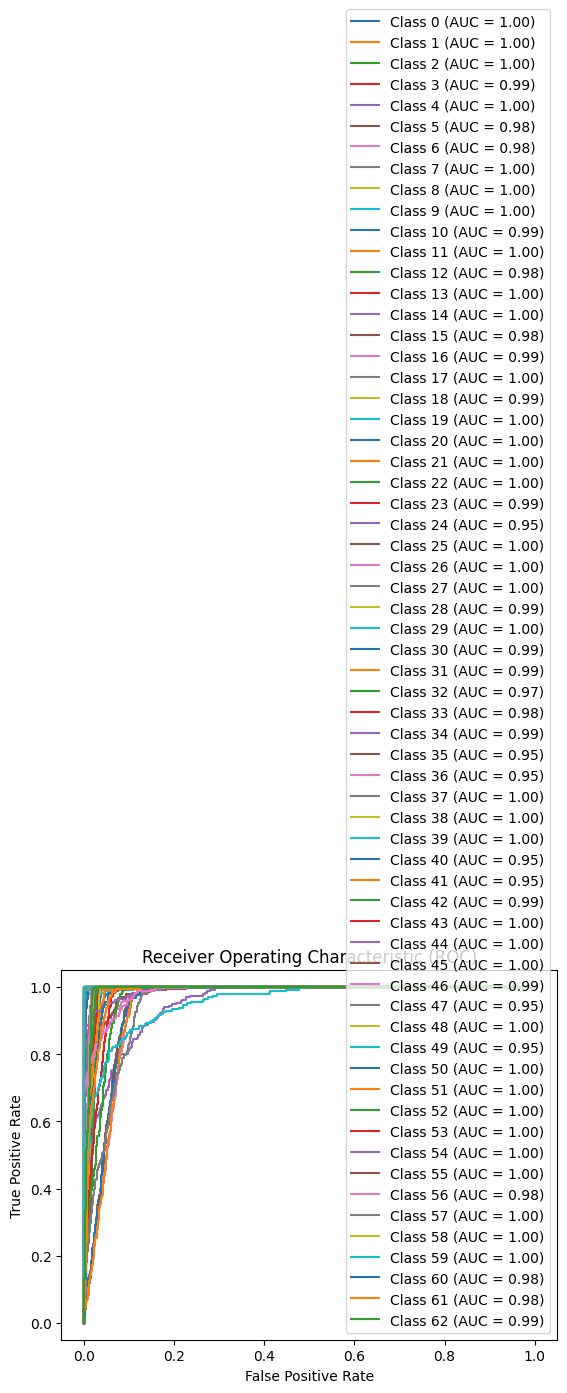

In [382]:
# Get predicted probabilities for test set
y_pred_proba = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(63):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(63):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Show the plot
plt.show()

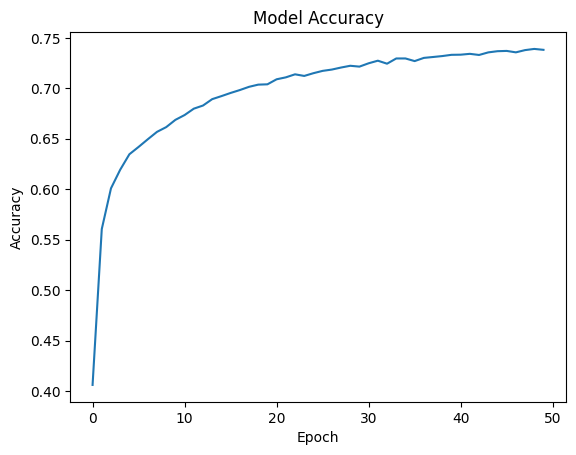

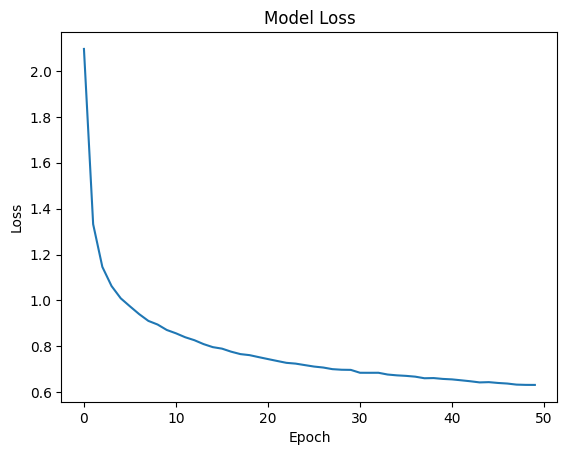

In [383]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# comparaison des performances

In [384]:
# Print the performance of each model
for p in performance:
    print('Model:', p['Model'])
    print('Accuracy Score:', p['Accuracy'])
    print('Recall score:', p['Recall'])
    print('F1 score:', p['F1'])
    print('Time Taken:', p['time'])
    print()

Model: LogisticRegression
Accuracy Score: 0.4936015924925352
Recall score: 0.4719218321143849
F1 score: 0.4719481570912142
Time Taken: 0.01222372055053711

Model: Linear Discriminant Analysis
Accuracy Score: 0.3885966159533627
Recall score: 0.4033858832355291
F1 score: 0.3664037013856847
Time Taken: 0.05787253379821777

Model: Support Vector Machines
Accuracy Score: 0.5145741504336698
Recall score: 0.5037843904970657
F1 score: 0.4960287088709187
Time Taken: 141.6077082157135

Model: Decision Tree
Accuracy Score: 0.7675956206455282
Recall score: 0.7691951077527331
F1 score: 0.7682891793015725
Time Taken: 0.012982606887817383

Model: Random Foreset
Accuracy Score: 0.7529503767951088
Recall score: 0.7516914342642075
F1 score: 0.7490394375882087
Time Taken: 1.3430399894714355

Model: Extra Trees
Accuracy Score: 0.5469216550547419
Recall score: 0.5367044683397463
F1 score: 0.5013868333416844
Time Taken: 0.5483555793762207

Model: Gausian Naive bayes
Accuracy Score: 0.5587942556519266
Recall

In [385]:
import pickle

# le nom du fichier dans lequel la liste sera enregistrée
file_name = 'performance.pkl'

# enregistrement de la liste dans le fichier
with open(file_name, 'wb') as file:
    pickle.dump(performance, file)

In [386]:
#Creating data frame with Column Names
comparision = pd.DataFrame (performance, columns = ['Model','Accuracy','Recall','F1','time'])
comparision

,Model,Accuracy,Recall,F1,time
0,LogisticRegression,0.493602,0.471922,0.471948,0.012224
1,Linear Discriminant Analysis,0.388597,0.403386,0.366404,0.057873
2,Support Vector Machines,0.514574,0.503784,0.496029,141.607708
3,Decision Tree,0.767596,0.769195,0.768289,0.012983
4,Random Foreset,0.752950,0.751691,0.749039,1.343040
5,Extra Trees,0.546922,0.536704,0.501387,0.548356
6,Gausian Naive bayes,0.558794,0.600910,0.530974,0.229218
7,eExtreme gradient boosting,0.775060,0.781628,0.776943,1.097776
8,CNN,0.714773,0.716556,0.694652,1.270829


In [387]:
print("Accuracy maximum : ", comparision["Accuracy"].max())
print("Recall maximum : ", comparision["Recall"].max())
print("F1 maximum : ", comparision["F1"].max())
print("time maximum : ", comparision["time"].max())

Accuracy maximum :  0.7750604294042371
Recall maximum :  0.7816282693522775
F1 maximum :  0.7769430427685912
time maximum :  141.6077082157135


In [388]:
print("Accuracy minimum : ", comparision["Accuracy"].min())
print("Recall minimum : ", comparision["Recall"].min())
print("F1 minimum : ", comparision["F1"].min())
print("time minimum : ", comparision["time"].min())

Accuracy minimum :  0.3885966159533627
Recall minimum :  0.4033858832355291
F1 minimum :  0.3664037013856847
time minimum :  0.01222372055053711


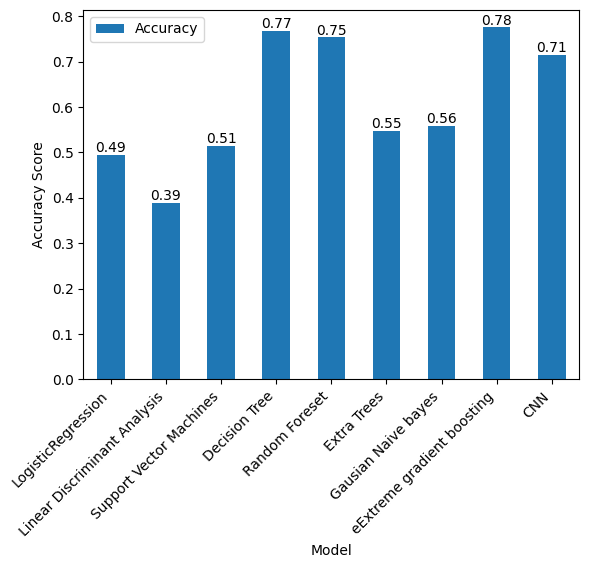

In [389]:
# Set Model column as index
comparision.set_index('Model', inplace=True)

# Plot accuracy comparison graph
ax = comparision.plot(kind='bar', y='Accuracy', rot=0)
ax.set_ylabel('Accuracy Score')

# Ajouter le texte associé à chaque barre de l'axe X
for i, val in enumerate(comparision['Accuracy']):
    ax.annotate("{:.2f}".format(val), xy=(i, val), va='bottom', ha='center')

# Modifier les étiquettes de l'axe X
ax.set_xticklabels(comparision.index, rotation=45, ha='right')

# Afficher le graphique
plt.show()


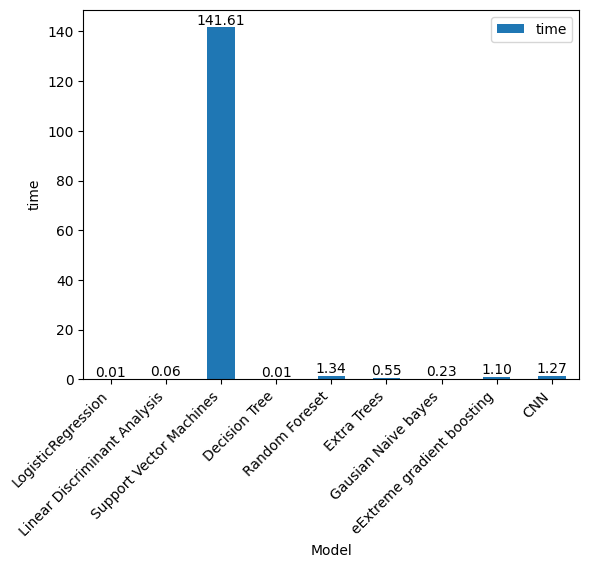

In [390]:
comparision = pd.DataFrame (performance, columns = ['Model','Accuracy','Recall','F1','time'])
# Set Model column as index
comparision.set_index('Model', inplace=True)

# Plot accuracy comparison graph
ax = comparision.plot(kind='bar', y='time', rot=0)
ax.set_ylabel('time')

# Ajouter le texte associé à chaque barre de l'axe X
for i, val in enumerate(comparision['time']):
    ax.annotate("{:.2f}".format(val), xy=(i, val), va='bottom', ha='center')

# Modifier les étiquettes de l'axe X
ax.set_xticklabels(comparision.index, rotation=45, ha='right')

# Afficher le graphique
plt.show()




# Approche Ensembliste

In [391]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


on combine les prédictions des modèles en utilisant la moyenne des probabilités prédites

In [397]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
import joblib
from tensorflow.keras.models import load_model

# Chargement des modèles préalablement enregistrés
decision_tree = joblib.load('DecisionTree.joblib')
random_forest = joblib.load('RandomForest.joblib')
xgboost = joblib.load('EXHB.joblib')
cnn = load_model('cnn.h5')

# Prétraitement des données pour la mise à plat
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # Mettre à plat les données en 2D

start_time = time.time()  # record start time 
# Prédiction des probabilités pour chaque modèle
y_pred_proba_decision_tree = decision_tree.predict_proba(X_test_flattened)
y_pred_proba_random_forest = random_forest.predict_proba(X_test_flattened)
y_pred_proba_xgboost = xgboost.predict_proba(X_test_flattened)
y_pred_proba_cnn = cnn.predict(X_test)
end_time = time.time()  # record end time
time_taken = end_time - start_time  # calculate time taken

# Calcul de la moyenne des probabilités prédites
y_pred_proba_ensemble = (y_pred_proba_decision_tree + y_pred_proba_random_forest + y_pred_proba_xgboost + y_pred_proba_cnn) / 4

# Convertir les probabilités en classes prédites (prendre l'indice de la classe avec la probabilité maximale)
y_pred_ensemble = np.argmax(y_pred_proba_ensemble, axis=1)

# Évaluation des performances de l'ensemble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='macro')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='macro')

print('Accuracy score (Ensemble): ', accuracy_ensemble)
print('Recall score (Ensemble): ', recall_ensemble)
print('F1 score (Ensemble): ', f1_ensemble)

# Sauvegarde du modèle d'ensemble
joblib.dump(y_pred_proba_ensemble, 'ensemble_model_multiclass.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


440/440 [==============================] - 1s 3ms/step
Accuracy score (Ensemble):  0.4974406369970141
Recall score (Ensemble):  0.4993798325714413
F1 score (Ensemble):  0.5020242191086144


['ensemble_model_multiclass.joblib']

In [398]:
performance.append({'Model': 'Ensemble_model', 'Accuracy': accuracy_ensemble, 'Recall': recall_ensemble, 'F1': f1_ensemble, 'time': time_taken})  # record performance

In [399]:
#Creating data frame with Column Names
comparision = pd.DataFrame (performance, columns = ['Model','Accuracy','Recall','F1','time'])
comparision

,Model,Accuracy,Recall,F1,time
0,LogisticRegression,0.493602,0.471922,0.471948,0.012224
1,Linear Discriminant Analysis,0.388597,0.403386,0.366404,0.057873
2,Support Vector Machines,0.514574,0.503784,0.496029,141.607708
3,Decision Tree,0.767596,0.769195,0.768289,0.012983
4,Random Foreset,0.752950,0.751691,0.749039,1.343040
5,Extra Trees,0.546922,0.536704,0.501387,0.548356
6,Gausian Naive bayes,0.558794,0.600910,0.530974,0.229218
7,eExtreme gradient boosting,0.775060,0.781628,0.776943,1.097776
8,CNN,0.714773,0.716556,0.694652,1.270829
9,Ensemble_model,0.497441,0.499380,0.502024,5.378286
